# The Inclusion-Exclusion Principle

*A visual guide to counting unions without double-counting*

---

The inclusion-exclusion principle is a fundamental counting technique that helps us determine the size of a union of sets. The challenge? When we naively add up the sizes of sets, we **double-count** elements that appear in multiple sets.

Venn diagrams make this principle crystal clear. Let's build up our understanding starting with two sets.

## The Problem: Naïve Counting Fails

Suppose we want to count how many elements are in "A **or** B" (written as $A \cup B$, the **union**).

Our first instinct might be:

$$|A \cup B| = |A| + |B| \quad \text{(wrong) WRONG!}$$

Why is this wrong? Because elements in **both** A and B (the intersection $A \cap B$) get counted **twice**!

The inclusion-exclusion principle fixes this:

$$|A \cup B| = |A| + |B| - |A \cap B| \quad \text{(correct) CORRECT}$$

Let's visualize why.

---

## Two Sets: The Foundation

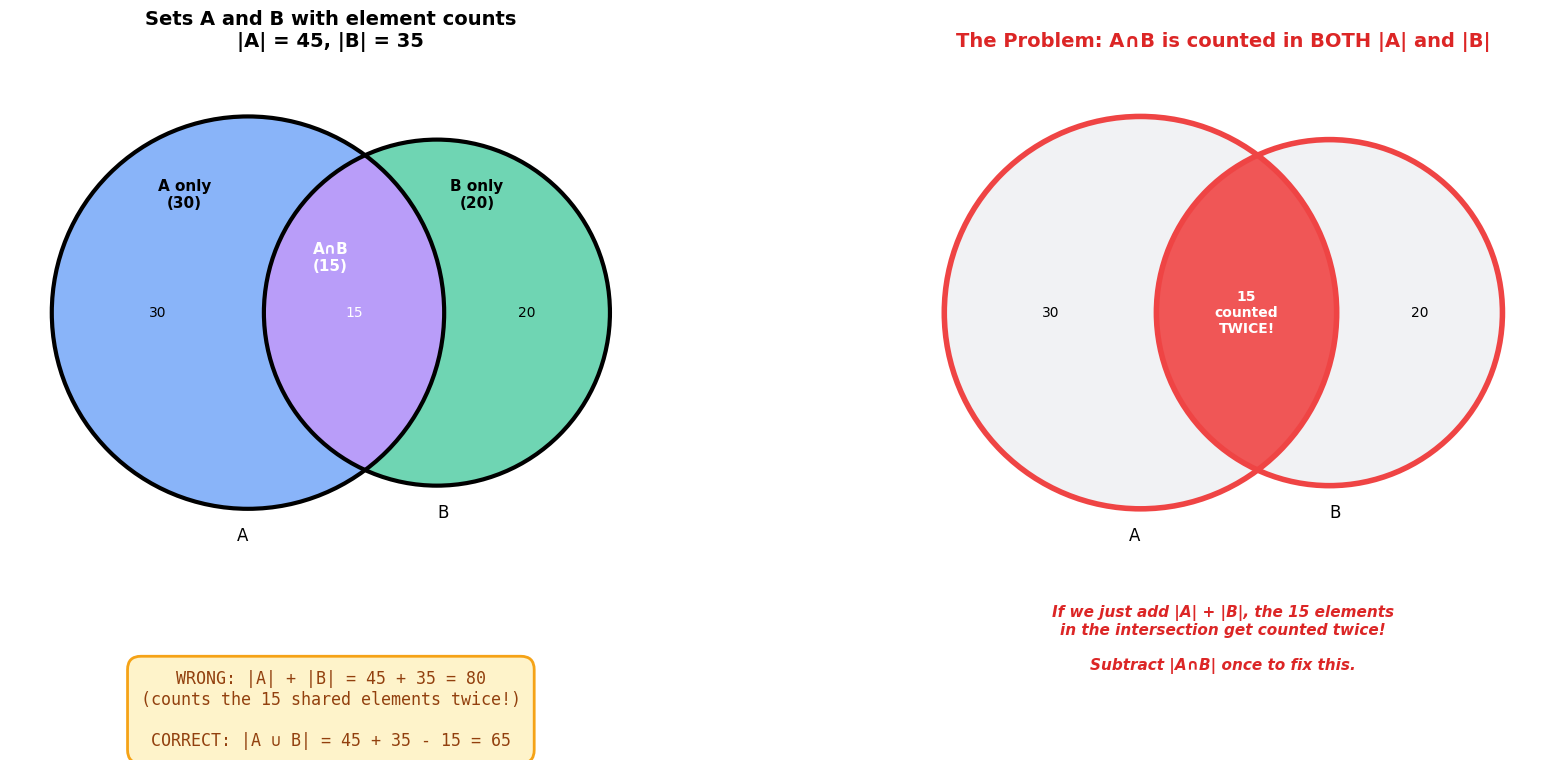

In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
import matplotlib.patches as mpatches

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Diagram 1: Show sets A and B with labels and correct totals
ax = axes[0]
v = venn2(subsets=(30, 20, 15), set_labels=('A', 'B'), ax=ax, alpha=0.6)
v.get_patch_by_id('10').set_color('#3b82f6')
v.get_patch_by_id('01').set_color('#10b981')
v.get_patch_by_id('11').set_color('#8b5cf6')
v.get_label_by_id('10').set_text('30')
v.get_label_by_id('01').set_text('20')
v.get_label_by_id('11').set_text('15')
v.get_label_by_id('11').set_color('white')
c = venn2_circles(subsets=(30, 20, 15), ax=ax, linewidth=3)
ax.set_title('Sets A and B with element counts\n|A| = 45, |B| = 35', 
             fontsize=14, fontweight='bold', pad=20)
ax.text(-0.35, 0.25, 'A only\n(30)', ha='center', fontsize=11, fontweight='bold')
ax.text(0.35, 0.25, 'B only\n(20)', ha='center', fontsize=11, fontweight='bold')
ax.text(0, 0.1, 'A∩B\n(15)', ha='center', fontsize=11, fontweight='bold', color='white')

# Add explanation box
textstr = 'WRONG: |A| + |B| = 45 + 35 = 80\n(counts the 15 shared elements twice!)\n\nCORRECT: |A ∪ B| = 45 + 35 - 15 = 65'
props = dict(boxstyle='round,pad=0.8', facecolor='#fef3c7', edgecolor='#f59e0b', linewidth=2, alpha=0.95)
ax.text(0.5, -0.25, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', ha='center', bbox=props, family='monospace', color='#92400e')

# Diagram 2: Highlight the intersection that causes double-counting
ax = axes[1]
v = venn2(subsets=(30, 20, 15), set_labels=('A', 'B'), ax=ax, alpha=0.3)
v.get_patch_by_id('10').set_color('#d1d5db')
v.get_patch_by_id('01').set_color('#d1d5db')
v.get_patch_by_id('11').set_color('#ef4444')
v.get_patch_by_id('11').set_alpha(0.9)
v.get_label_by_id('10').set_text('30')
v.get_label_by_id('01').set_text('20')
v.get_label_by_id('11').set_text('15\ncounted\nTWICE!')
v.get_label_by_id('11').set_color('white')
v.get_label_by_id('11').set_fontweight('bold')
v.get_label_by_id('11').set_fontsize(10)
c = venn2_circles(subsets=(30, 20, 15), ax=ax, linewidth=3)
c[0].set_edgecolor('#ef4444')
c[1].set_edgecolor('#ef4444')
c[0].set_linewidth(4)
c[1].set_linewidth(4)
ax.set_title('The Problem: A∩B is counted in BOTH |A| and |B|', 
             fontsize=14, fontweight='bold', pad=20, color='#dc2626')

# Add explanation
ax.text(0.5, -0.25, 'If we just add |A| + |B|, the 15 elements\nin the intersection get counted twice!\n\nSubtract |A∩B| once to fix this.', 
        transform=ax.transAxes, fontsize=11, ha='center', 
        style='italic', color='#dc2626', fontweight='bold')

plt.tight_layout()
plt.show()

### The Two-Set Formula

$$|A \cup B| = |A| + |B| - |A \cap B|$$

**Why it works:**
1. Start by adding $|A|$ and $|B|$ — this counts everything in both sets
2. But wait! Elements in $A \cap B$ were counted **twice** (once in $|A|$, once in $|B|$)
3. Subtract $|A \cap B|$ once to correct the double-counting

**Note:** $A \cap B = B \cap A$ (intersection is **commutative**) — order doesn't matter!

---

## Example 1: Student Clubs

**Scenario:** At a school:
- 45 students are in the **Drama Club** (set D)
- 35 students are in the **Chess Club** (set C)
- 15 students are in **both clubs** (D ∩ C)

**Question:** How many students are in *at least one* club?

### Solution

Using inclusion-exclusion:

$$|D \cup C| = |D| + |C| - |D \cap C|$$

$$|D \cup C| = 45 + 35 - 15 = 65$$

**Answer:** 65 students are in at least one club.

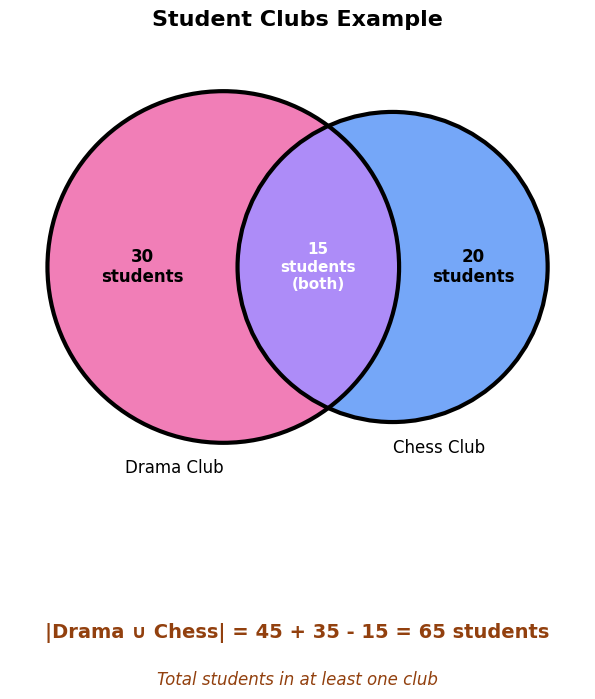

In [2]:
fig, ax = plt.subplots(figsize=(12, 8))

# Drama = 45, Chess = 35, Both = 15
# Drama only = 45 - 15 = 30
# Chess only = 35 - 15 = 20
v = venn2(subsets=(30, 20, 15), set_labels=('Drama Club', 'Chess Club'), ax=ax, alpha=0.7)
v.get_patch_by_id('10').set_color('#ec4899')
v.get_patch_by_id('01').set_color('#3b82f6')
v.get_patch_by_id('11').set_color('#8b5cf6')

v.get_label_by_id('10').set_text('30\nstudents')
v.get_label_by_id('10').set_fontsize(12)
v.get_label_by_id('10').set_fontweight('bold')

v.get_label_by_id('01').set_text('20\nstudents')
v.get_label_by_id('01').set_fontsize(12)
v.get_label_by_id('01').set_fontweight('bold')

v.get_label_by_id('11').set_text('15\nstudents\n(both)')
v.get_label_by_id('11').set_fontsize(11)
v.get_label_by_id('11').set_fontweight('bold')
v.get_label_by_id('11').set_color('white')

c = venn2_circles(subsets=(30, 20, 15), ax=ax, linewidth=3)
ax.set_title('Student Clubs Example', fontsize=16, fontweight='bold', pad=20)

# Add calculation box
calculation_box = mpatches.FancyBboxPatch((0.15, -0.55), 0.7, 0.22, 
                                         boxstyle='round,pad=0.02', 
                                         facecolor='#fef3c7', edgecolor='#f59e0b', 
                                         linewidth=3, transform=ax.transAxes)
ax.add_patch(calculation_box)
ax.text(0.5, -0.37, '|Drama ∪ Chess| = 45 + 35 - 15 = 65 students', 
        ha='center', fontsize=14, fontweight='bold', color='#92400e',
        transform=ax.transAxes)
ax.text(0.5, -0.48, 'Total students in at least one club', 
        ha='center', fontsize=12, color='#92400e', style='italic',
        transform=ax.transAxes)

plt.tight_layout()
plt.show()

---

## Extending to Three Sets

With three sets, the counting becomes trickier. We need to:

1. **Include** all three sets individually
2. **Exclude** all pairwise intersections (we double-counted them)
3. **Include** the triple intersection back (we excluded it too many times!)

The formula:

$$|A \cup B \cup C| = |A| + |B| + |C| - |A \cap B| - |A \cap C| - |B \cap C| + |A \cap B \cap C|$$

Let's visualize why each term is necessary.

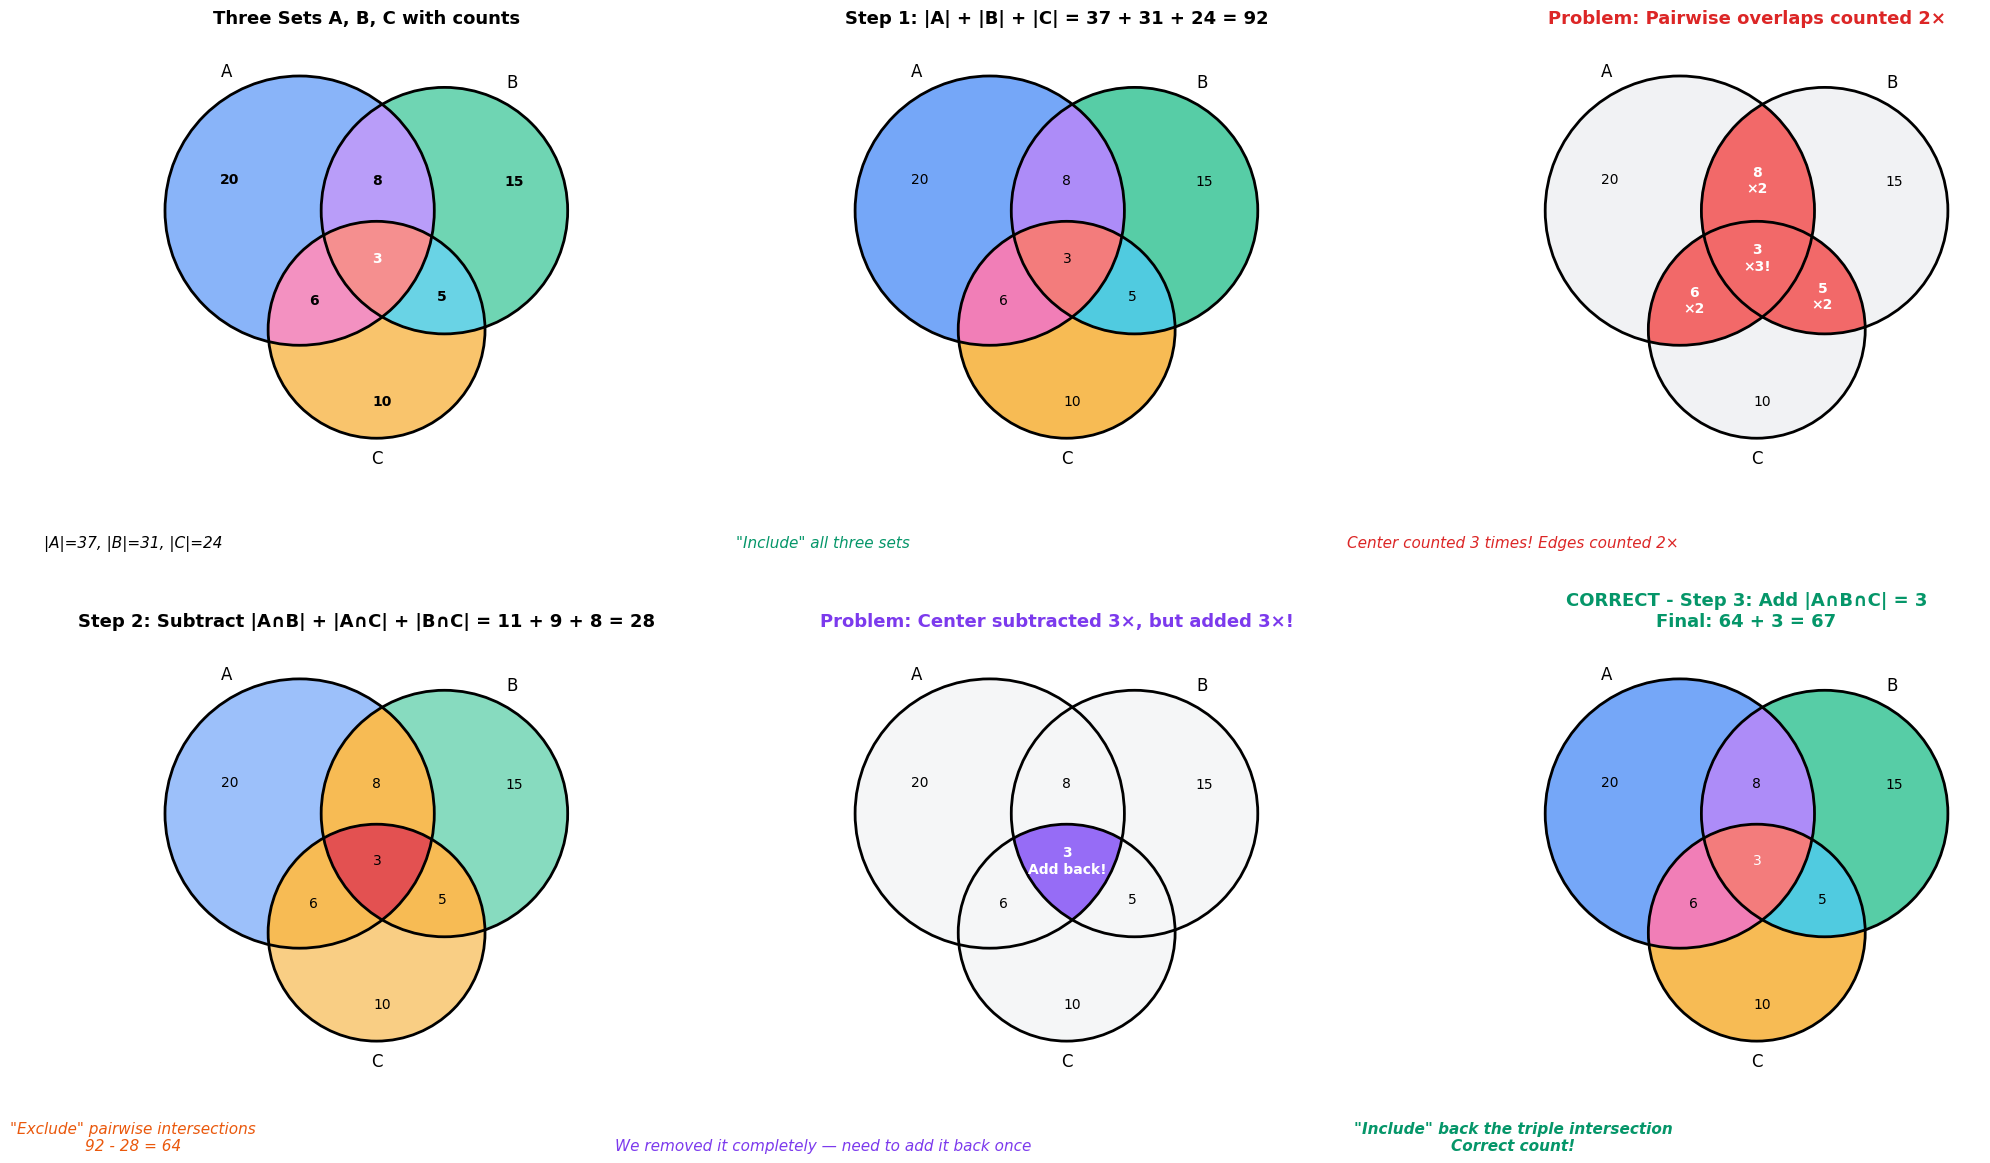

In [3]:
from matplotlib_venn import venn3, venn3_circles

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Using actual counts for a concrete example
# A only=20, B only=15, C only=10, AB only=8, AC only=6, BC only=5, ABC=3
subsets = (20, 15, 8, 10, 6, 5, 3)

# Diagram 1: Show all three sets with counts
ax = axes[0, 0]
v = venn3(subsets=subsets, set_labels=('A', 'B', 'C'), ax=ax, alpha=0.6)
colors = {'100': '#3b82f6', '010': '#10b981', '001': '#f59e0b',
          '110': '#8b5cf6', '101': '#ec4899', '011': '#06b6d4', '111': '#ef4444'}
labels = {'100': '20', '010': '15', '001': '10',
          '110': '8', '101': '6', '011': '5', '111': '3'}
for patch_id, color in colors.items():
    if v.get_patch_by_id(patch_id):
        v.get_patch_by_id(patch_id).set_color(color)
        if patch_id == '111':
            v.get_label_by_id(patch_id).set_color('white')
        v.get_label_by_id(patch_id).set_text(labels[patch_id])
        v.get_label_by_id(patch_id).set_fontweight('bold')
venn3_circles(subsets=subsets, ax=ax, linewidth=2)
ax.set_title('Three Sets A, B, C with counts', fontsize=13, fontweight='bold', pad=15)
ax.text(0, -0.18, '|A|=37, |B|=31, |C|=24', ha='center', fontsize=11, 
        style='italic', transform=ax.transAxes)

# Diagram 2: Step 1 - Add all three
ax = axes[0, 1]
v = venn3(subsets=subsets, set_labels=('A', 'B', 'C'), ax=ax, alpha=0.7)
for patch_id, color in colors.items():
    if v.get_patch_by_id(patch_id):
        v.get_patch_by_id(patch_id).set_color(color)
venn3_circles(subsets=subsets, ax=ax, linewidth=2)
ax.set_title('Step 1: |A| + |B| + |C| = 37 + 31 + 24 = 92', 
             fontsize=13, fontweight='bold', pad=15)
ax.text(0, -0.18, '"Include" all three sets', ha='center', fontsize=11, 
        style='italic', transform=ax.transAxes, color='#059669')

# Diagram 3: Highlight pairwise intersections (double-counted)
ax = axes[0, 2]
v = venn3(subsets=subsets, set_labels=('A', 'B', 'C'), ax=ax, alpha=0.3)
for patch_id in ['100', '010', '001']:
    if v.get_patch_by_id(patch_id):
        v.get_patch_by_id(patch_id).set_color('#d1d5db')
# Highlight pairwise intersections
for patch_id in ['110', '101', '011', '111']:
    if v.get_patch_by_id(patch_id):
        v.get_patch_by_id(patch_id).set_color('#ef4444')
        v.get_patch_by_id(patch_id).set_alpha(0.8)
        v.get_label_by_id(patch_id).set_color('white')
        v.get_label_by_id(patch_id).set_fontweight('bold')
        if patch_id == '111':
            v.get_label_by_id(patch_id).set_text('3\n×3!')
        else:
            v.get_label_by_id(patch_id).set_text(labels[patch_id] + '\n×2')
venn3_circles(subsets=subsets, ax=ax, linewidth=2)
ax.set_title('Problem: Pairwise overlaps counted 2×', 
             fontsize=13, fontweight='bold', pad=15, color='#dc2626')
ax.text(0, -0.18, 'Center counted 3 times! Edges counted 2×', ha='center', 
        fontsize=11, style='italic', transform=ax.transAxes, color='#dc2626')

# Diagram 4: Step 2 - Subtract pairwise
ax = axes[1, 0]
v = venn3(subsets=subsets, set_labels=('A', 'B', 'C'), ax=ax, alpha=0.5)
for patch_id in ['100', '010', '001']:
    if v.get_patch_by_id(patch_id):
        v.get_patch_by_id(patch_id).set_color(colors[patch_id])
for patch_id in ['110', '101', '011']:
    if v.get_patch_by_id(patch_id):
        v.get_patch_by_id(patch_id).set_color('#f59e0b')
        v.get_patch_by_id(patch_id).set_alpha(0.7)
if v.get_patch_by_id('111'):
    v.get_patch_by_id('111').set_color('#dc2626')
    v.get_patch_by_id('111').set_alpha(0.8)
venn3_circles(subsets=subsets, ax=ax, linewidth=2)
ax.set_title('Step 2: Subtract |A∩B| + |A∩C| + |B∩C| = 11 + 9 + 8 = 28', 
             fontsize=13, fontweight='bold', pad=15)
ax.text(0, -0.18, '"Exclude" pairwise intersections\n92 - 28 = 64', 
        ha='center', fontsize=11, style='italic', transform=ax.transAxes, color='#ea580c')

# Diagram 5: Highlight triple intersection (excluded too much!)
ax = axes[1, 1]
v = venn3(subsets=subsets, set_labels=('A', 'B', 'C'), ax=ax, alpha=0.2)
for patch_id in ['100', '010', '001', '110', '101', '011']:
    if v.get_patch_by_id(patch_id):
        v.get_patch_by_id(patch_id).set_color('#d1d5db')
if v.get_patch_by_id('111'):
    v.get_patch_by_id('111').set_color('#8b5cf6')
    v.get_patch_by_id('111').set_alpha(0.9)
    v.get_label_by_id('111').set_text('3\nAdd back!')
    v.get_label_by_id('111').set_color('white')
    v.get_label_by_id('111').set_fontweight('bold')
venn3_circles(subsets=subsets, ax=ax, linewidth=2)
ax.set_title('Problem: Center subtracted 3×, but added 3×!', 
             fontsize=13, fontweight='bold', pad=15, color='#7c3aed')
ax.text(0, -0.18, 'We removed it completely — need to add it back once', 
        ha='center', fontsize=11, style='italic', transform=ax.transAxes, color='#7c3aed')

# Diagram 6: Step 3 - Add back triple
ax = axes[1, 2]
v = venn3(subsets=subsets, set_labels=('A', 'B', 'C'), ax=ax, alpha=0.7)
for patch_id, color in colors.items():
    if v.get_patch_by_id(patch_id):
        v.get_patch_by_id(patch_id).set_color(color)
        if patch_id == '111':
            v.get_label_by_id(patch_id).set_color('white')
venn3_circles(subsets=subsets, ax=ax, linewidth=2)
ax.set_title('CORRECT - Step 3: Add |A∩B∩C| = 3\nFinal: 64 + 3 = 67', 
             fontsize=13, fontweight='bold', pad=15, color='#059669')
ax.text(0, -0.18, '"Include" back the triple intersection\nCorrect count!', 
        ha='center', fontsize=11, style='italic', transform=ax.transAxes, color='#059669', fontweight='bold')

plt.tight_layout()
plt.show()

### Why Each Term in the Three-Set Formula?

$$|A \cup B \cup C| = |A| + |B| + |C| - |A \cap B| - |A \cap C| - |B \cap C| + |A \cap B \cap C|$$

**Understanding the counting:**

| Region | Times in sum | After subtracting pairs | After adding triple |
|--------|--------------|-------------------------|---------------------|
| A only | 1x | 1x | 1x (correct) |
| B only | 1x | 1x | 1x (correct) |
| C only | 1x | 1x | 1x (correct) |
| A∩B only | 2x | 2x - 1x = 1x | 1x (correct) |
| A∩C only | 2x | 2x - 1x = 1x | 1x (correct) |
| B∩C only | 2x | 2x - 1x = 1x | 1x (correct) |
| A∩B∩C | 3x | 3x - 3x = 0x | 0x + 1x = 1x (correct) |

The center region (A∩B∩C) is:
- Added **3 times** (once each in |A|, |B|, |C|)
- Subtracted **3 times** (once each in |A∩B|, |A∩C|, |B∩C|)
- Net = 0, so we add it back **once** with +|A∩B∩C|

---

## Example 2: Programming Languages Survey

**Scenario:** A survey of 100 programmers asks about language proficiency:
- **Python (P):** 50 programmers
- **JavaScript (J):** 40 programmers
- **Rust (R):** 30 programmers

**Overlaps:**
- **P ∩ J:** 20 programmers know both Python and JavaScript
- **P ∩ R:** 15 programmers know both Python and Rust
- **J ∩ R:** 10 programmers know both JavaScript and Rust
- **P ∩ J ∩ R:** 8 programmers know all three

**Question:** How many programmers know *at least one* of these languages?

### Solution

$$|P \cup J \cup R| = |P| + |J| + |R| - |P \cap J| - |P \cap R| - |J \cap R| + |P \cap J \cap R|$$

$$|P \cup J \cup R| = 50 + 40 + 30 - 20 - 15 - 10 + 8$$

$$|P \cup J \cup R| = 120 - 45 + 8 = 83$$

**Answer:** 83 programmers know at least one of Python, JavaScript, or Rust.

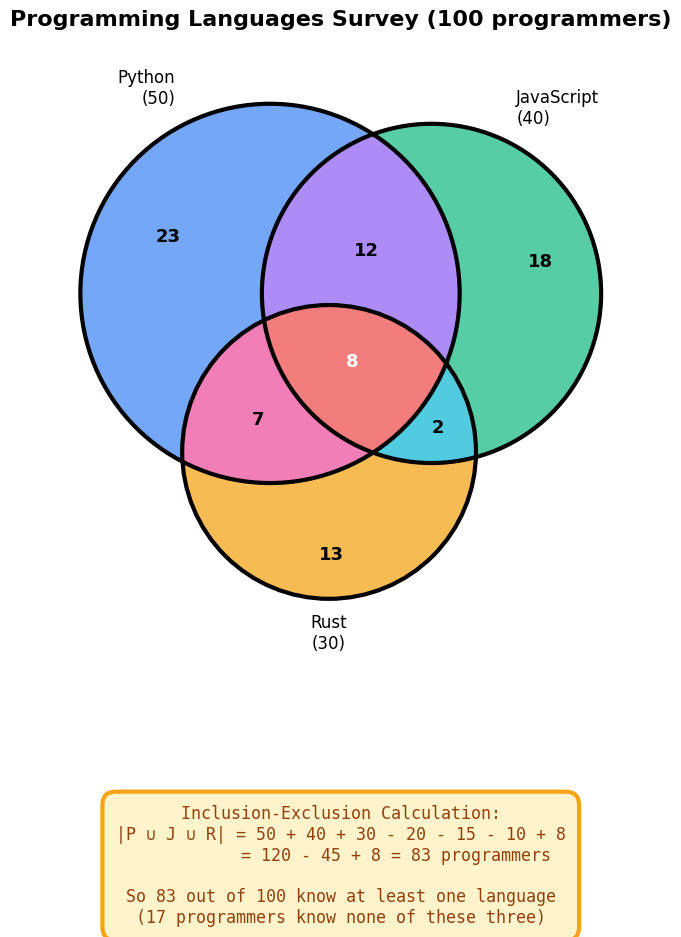

In [4]:
fig, ax = plt.subplots(figsize=(14, 10))

# Calculate the seven regions
# P only = 50 - 20 - 15 + 8 = 23
# J only = 40 - 20 - 10 + 8 = 18
# R only = 30 - 15 - 10 + 8 = 13
# PJ only = 20 - 8 = 12
# PR only = 15 - 8 = 7
# JR only = 10 - 8 = 2
# PJR = 8
subsets = (23, 18, 12, 13, 7, 2, 8)

v = venn3(subsets=subsets, 
          set_labels=('Python\n(50)', 'JavaScript\n(40)', 'Rust\n(30)'), 
          ax=ax, alpha=0.7)

colors = {
    '100': '#3b82f6',  # Python only
    '010': '#10b981',  # JS only
    '001': '#f59e0b',  # Rust only
    '110': '#8b5cf6',  # Python & JS
    '101': '#ec4899',  # Python & Rust
    '011': '#06b6d4',  # JS & Rust
    '111': '#ef4444'   # All three
}

labels_text = {
    '100': '23', '010': '18', '001': '13',
    '110': '12', '101': '7', '011': '2', '111': '8'
}

for patch_id, color in colors.items():
    if v.get_patch_by_id(patch_id):
        v.get_patch_by_id(patch_id).set_color(color)
        v.get_label_by_id(patch_id).set_text(labels_text[patch_id])
        v.get_label_by_id(patch_id).set_fontsize(13)
        v.get_label_by_id(patch_id).set_fontweight('bold')
        if patch_id == '111':
            v.get_label_by_id(patch_id).set_color('white')

venn3_circles(subsets=subsets, ax=ax, linewidth=3)
ax.set_title('Programming Languages Survey (100 programmers)', 
             fontsize=16, fontweight='bold', pad=25)

# Add calculation box
calculation_text = '''Inclusion-Exclusion Calculation:
|P ∪ J ∪ R| = 50 + 40 + 30 - 20 - 15 - 10 + 8
           = 120 - 45 + 8 = 83 programmers

So 83 out of 100 know at least one language
(17 programmers know none of these three)'''

props = dict(boxstyle='round,pad=0.8', facecolor='#fef3c7', 
             edgecolor='#f59e0b', linewidth=3, alpha=0.95)
ax.text(0.5, -0.28, calculation_text, transform=ax.transAxes,
        fontsize=12, verticalalignment='top', ha='center',
        bbox=props, family='monospace', color='#92400e')

plt.tight_layout()
plt.show()

---

## Example 3: Probability Version

The inclusion-exclusion principle also works for **probabilities**!

$$P(A \cup B \cup C) = P(A) + P(B) + P(C) - P(A \cap B) - P(A \cap C) - P(B \cap C) + P(A \cap B \cap C)$$

**Scenario:** Rolling a fair six-sided die:
- **Event A:** Roll is divisible by 2 (outcomes: {2, 4, 6})
- **Event B:** Roll is divisible by 3 (outcomes: {3, 6})
- **Event C:** Roll is ≤ 3 (outcomes: {1, 2, 3})

**Question:** What's the probability of rolling a number that satisfies *at least one* of these conditions?

### Solution

First, let's identify the sets:
- A = {2, 4, 6}, so P(A) = 3/6 = 1/2
- B = {3, 6}, so P(B) = 2/6 = 1/3
- C = {1, 2, 3}, so P(C) = 3/6 = 1/2

**Intersections:**
- A ∩ B = {6} → P(A ∩ B) = 1/6
- A ∩ C = {2} → P(A ∩ C) = 1/6
- B ∩ C = {3} → P(B ∩ C) = 1/6
- A ∩ B ∩ C = {} (empty) → P(A ∩ B ∩ C) = 0

**Apply inclusion-exclusion:**

$$P(A \cup B \cup C) = \frac{1}{2} + \frac{1}{3} + \frac{1}{2} - \frac{1}{6} - \frac{1}{6} - \frac{1}{6} + 0$$

$$P(A \cup B \cup C) = \frac{3}{6} + \frac{2}{6} + \frac{3}{6} - \frac{1}{6} - \frac{1}{6} - \frac{1}{6}$$

$$P(A \cup B \cup C) = \frac{8}{6} - \frac{3}{6} = \frac{5}{6}$$

**Answer:** The probability is 5/6.

**Verification:** The union is {1, 2, 3, 4, 6} — that's 5 outcomes out of 6, confirming P = 5/6. (correct)

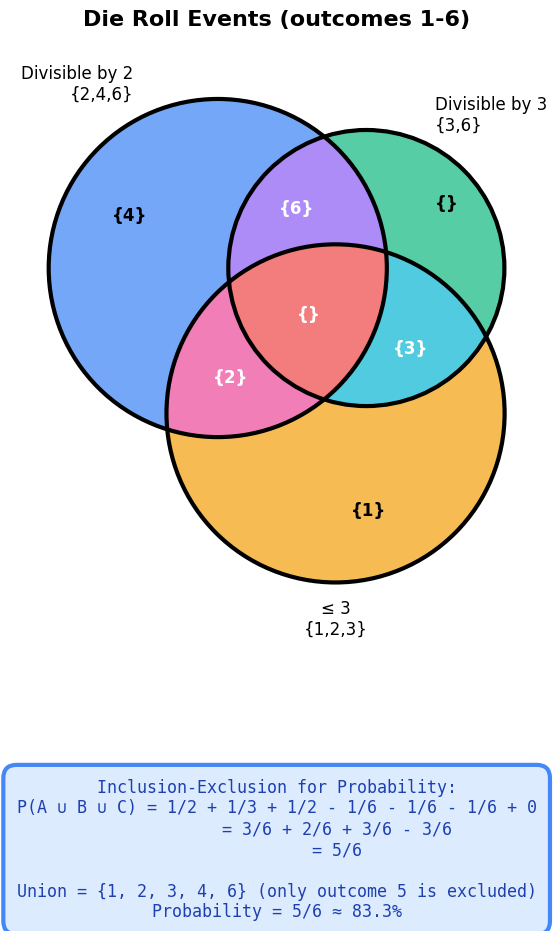

In [5]:
fig, ax = plt.subplots(figsize=(14, 10))

# A = {2,4,6} = 3 elements, B = {3,6} = 2 elements, C = {1,2,3} = 3 elements
# A only = {4} = 1
# B only = {} = 0 (since 3 is in C, and 6 is in A)
# C only = {1} = 1
# AB only = {6} = 1
# AC only = {2} = 1
# BC only = {3} = 1
# ABC = {} = 0
subsets = (1, 0, 1, 1, 1, 1, 0)

v = venn3(subsets=subsets,
          set_labels=('Divisible by 2\n{2,4,6}', 'Divisible by 3\n{3,6}', '≤ 3\n{1,2,3}'),
          ax=ax, alpha=0.7)

colors = {
    '100': '#3b82f6',
    '010': '#10b981',
    '001': '#f59e0b',
    '110': '#8b5cf6',
    '101': '#ec4899',
    '011': '#06b6d4',
    '111': '#ef4444'
}

labels_map = {
    '100': '{4}',
    '010': '{}',
    '001': '{1}',
    '110': '{6}',
    '101': '{2}',
    '011': '{3}',
    '111': '{}'
}

for patch_id, color in colors.items():
    if v.get_patch_by_id(patch_id):
        v.get_patch_by_id(patch_id).set_color(color)
        v.get_label_by_id(patch_id).set_text(labels_map[patch_id])
        v.get_label_by_id(patch_id).set_fontsize(12)
        v.get_label_by_id(patch_id).set_fontweight('bold')
        if patch_id in ['111', '110', '101', '011']:
            v.get_label_by_id(patch_id).set_color('white')

venn3_circles(subsets=subsets, ax=ax, linewidth=3)
ax.set_title('Die Roll Events (outcomes 1-6)', fontsize=16, fontweight='bold', pad=25)

# Add calculation box
calculation_text = '''Inclusion-Exclusion for Probability:
P(A ∪ B ∪ C) = 1/2 + 1/3 + 1/2 - 1/6 - 1/6 - 1/6 + 0
            = 3/6 + 2/6 + 3/6 - 3/6
            = 5/6

Union = {1, 2, 3, 4, 6} (only outcome 5 is excluded)
Probability = 5/6 ≈ 83.3%'''

props = dict(boxstyle='round,pad=0.8', facecolor='#dbeafe',
             edgecolor='#3b82f6', linewidth=3, alpha=0.95)
ax.text(0.5, -0.28, calculation_text, transform=ax.transAxes,
        fontsize=12, verticalalignment='top', ha='center',
        bbox=props, family='monospace', color='#1e40af')

plt.tight_layout()
plt.show()

---

## The General Formula

For **n sets** A₁, A₂, ..., Aₙ, the inclusion-exclusion principle extends to:

$$|A_1 \cup A_2 \cup \cdots \cup A_n| = \sum_{i} |A_i| - \sum_{i<j} |A_i \cap A_j| + \sum_{i<j<k} |A_i \cap A_j \cap A_k| - \cdots + (-1)^{n+1} |A_1 \cap A_2 \cap \cdots \cap A_n|$$

**Pattern:**
1. **Add** all single sets
2. **Subtract** all pairwise intersections
3. **Add** all triple intersections
4. **Subtract** all quadruple intersections
5. Continue alternating **+** and **-**

The signs alternate because we're correcting for over-counting and under-counting at each step!

---

## Key Takeaways

1. **Naïve addition overcounts** — elements in multiple sets get counted multiple times

2. **Two sets:** $|A \cup B| = |A| + |B| - |A \cap B|$
   - Subtract the intersection once to fix double-counting

3. **Three sets:** $|A \cup B \cup C| = |A| + |B| + |C| - |A \cap B| - |A \cap C| - |B \cap C| + |A \cap B \cap C|$
   - Subtract pairwise intersections, then add back the triple intersection

4. **Intersection is commutative:** $A \cap B = B \cap A$ (order doesn't matter)

5. **Works for probabilities too:** Replace set sizes with probabilities

6. **Pattern for n sets:** Alternate between adding and subtracting, working through all possible intersections

7. **Venn diagrams are your friend** — they make the over-counting and correction visible!

---

*The inclusion-exclusion principle is fundamental in combinatorics, probability theory, and computer science. Master it, and you'll have a powerful tool for solving counting problems!*